In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import shutil
import re
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 

## 1.C)

In [39]:
current_path= Path().absolute()         # current path
test_path= current_path/"test"/"test"   # path to the test data
train_path= current_path/"train"/"train"    # path to train data

In [40]:
original_data_path= current_path/ "original_data"   # original data folder path
original_data_path.mkdir(exist_ok=True)             # making the folder

In [41]:
if test_path.exists():  # if the folders exist in test test, then move it to original
    shutil.move(test_path, original_data_path)
if train_path.exists():
    shutil.move(train_path, original_data_path)

In [42]:
experimental_small= current_path/"experiment_small_data"
experimental_small.mkdir(exist_ok=True)

experimental_small_train= experimental_small/"train"
experimental_small_train.mkdir(exist_ok=True)

experimental_small_test= experimental_small/"test"
experimental_small_test.mkdir(exist_ok=True)

experimental_small_val= experimental_small/"val"
experimental_small_val.mkdir(exist_ok=True)

In [43]:
folders_delete = [  # list of folders to delete
    current_path / "test",
    current_path / "train",
]

for folder in folders_delete:   # delete folder if it exists
    if folder.exists():
        shutil.rmtree(folder)

## 1.A/B)

In [44]:
original_data= current_path/"original_data" # path original data
test_data_path= original_data/"test" # new test data
train_data_path= original_data/"train"   # new train data

In [45]:
train_list= list(train_data_path.iterdir())  # list of the image train paths
test_list= list(test_data_path.iterdir())  # list of the image test paths

pictures= np.random.choice(train_list, 10)  # ten random paths

In [46]:
pattern = r"\b\w{3}\b"  # pattern for dog or cat
labels = [re.findall(pattern, path.name)[0] for path in pictures]   # regx to find pattern in the file name of the path 0 to take name and not jpg (first match)

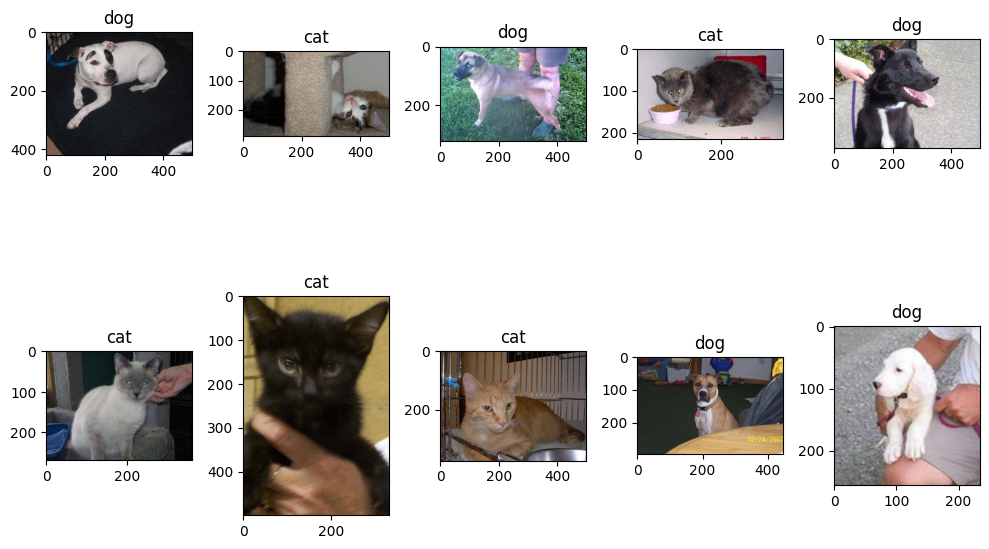

In [47]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))       
for i, ax in enumerate(axes.flatten()):
    image_path= train_data_path/f"{pictures[i]}"   # image math for the current number in the list
    image= plt.imread(image_path)       # reads as image
    ax.imshow(image)                    # showing image
    ax.set_title(labels[i])
    
fig.tight_layout()  

## 1.D)

In [48]:
def dogs_cats(train_test_val:list, animal_needed:int):
    
    total_dogs= [dog for dog in train_test_val if "dog" in dog.name]   # picking out all dogs
    np.random.shuffle(total_dogs)   # shuffle

    dogs= total_dogs[:animal_needed]    # picking number of dogs we need
    
    
    """Same thins for cats"""
    total_cats= [cat for cat in train_test_val if "cat" in cat.name]
    np.random.shuffle(total_cats)

    cats= total_cats[:animal_needed]
    
    for dog, cat in zip(dogs, cats):    # remove selected paths
        total_dogs.remove(dog)
        total_cats.remove(cat)
        
    updated_list = [animal for animal in train_test_val if animal not in dogs and animal not in cats] # updated list with non of the selected antimals to return
        
    total_data= []
    for dog, cat in zip(dogs, cats):    # list of the data set that you requested
        total_data.append(dog)
        total_data.append(cat)
    return total_data, updated_list

In [49]:
train_data_small, train_list= dogs_cats(train_list, 800)
test_data_small, train_list= dogs_cats(train_list, 250)
val_data_small, train_list= dogs_cats(train_list, 200)

print(f"train: {len(train_data_small)}\ntest: {len(test_data_small)}")

train: 1600
test: 500


In [50]:
import os

def move_list_to_folder(data_path, data_set):
    empty= any(os.scandir(data_path))   # checks if folder is empty and gives empty true or false
    
    """Checks if it is empty. If it is it adds the paths to the folder, if it's not empty, it prints a message"""
    if not empty:
        for path in data_set:
            shutil.move(path, data_path)
    else:
        print("This directory is not empty.")

In [51]:
move_list_to_folder(experimental_small_train, train_data_small)
move_list_to_folder(experimental_small_test, test_data_small)
move_list_to_folder(experimental_small_val, val_data_small)

This directory is not empty.
This directory is not empty.
This directory is not empty.


## 1.E)

In [52]:
train_list= list(experimental_small_train.iterdir())    # lsit of the paths
test_list= list(experimental_small_test.iterdir())    # lsit of the paths
val_list= list(experimental_small_val.iterdir())    # lsit of the paths

In [53]:
def label_data(data):
    """Labels the lists with 1 or 0 for dog and cat"""
    labels= []
    images= []
    np.random.shuffle(data)   #shuffel to see random images
    for path in data:    # setting labels 1 for dog, 0 for cat
        label= 1 if "dog" in path.name else 0
        labels.append(label)
        
        image= cv2.imread(str(path))
        images.append(image)
        
    return images, labels


In [54]:
X_train, y_train= label_data(train_list)
X_test, y_test= label_data(test_list)
X_val, y_val= label_data(val_list)

In [55]:
y_train

[1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,


In [56]:
"""Plotting to see if labels were correctly added"""
def plot_image(images, labels):
    fig, axes= plt.subplots(2, 5, figsize= (12, 6))
    
    for i, ax in enumerate(axes.flatten()):
        
        ax.imshow(images[i])    # plotting the image
        ax.set_title(labels[i])  # and setting the title

    fig.tight_layout()

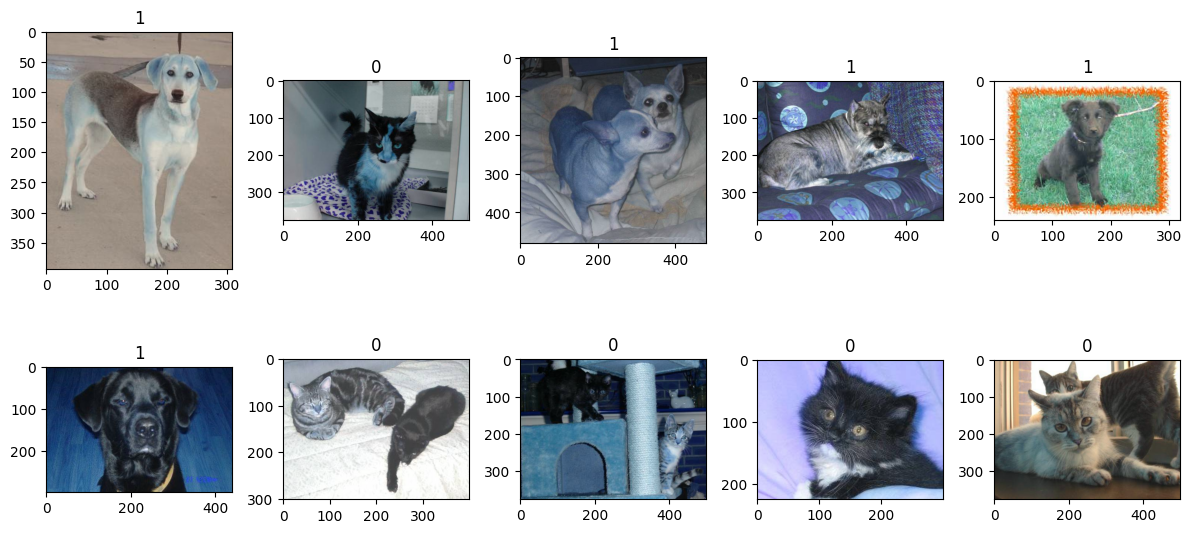

In [57]:
plot_image(X_train, y_train)

In [58]:
def plot(images, labels):
    """From list to df for plotting"""

    df = pd.DataFrame(
        {
            "image": images,
            "label": labels
        }
    )
    df["count"] = df["label"].sum()
    sns.barplot(data=df, x="label", y="count")

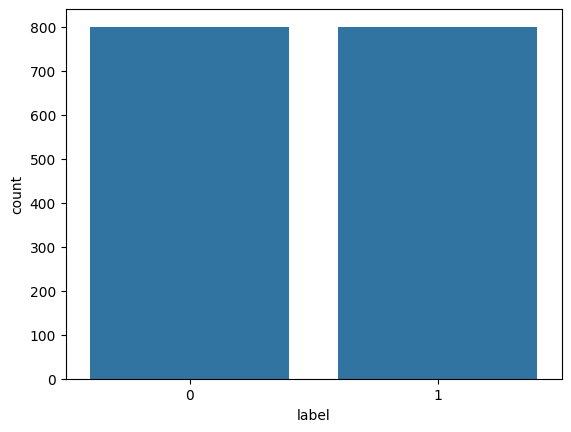

In [59]:
plot(X_train, y_train)

## 2.A)

In [60]:
def image_sizes(data):
    """Gives list of the image sizes"""
    image_sizes= []
    
    for image in data:
        image_size= image.shape[:2]
        image_sizes.append(image_size)
        
    return image_sizes

In [61]:
train_sizes= image_sizes(X_train)

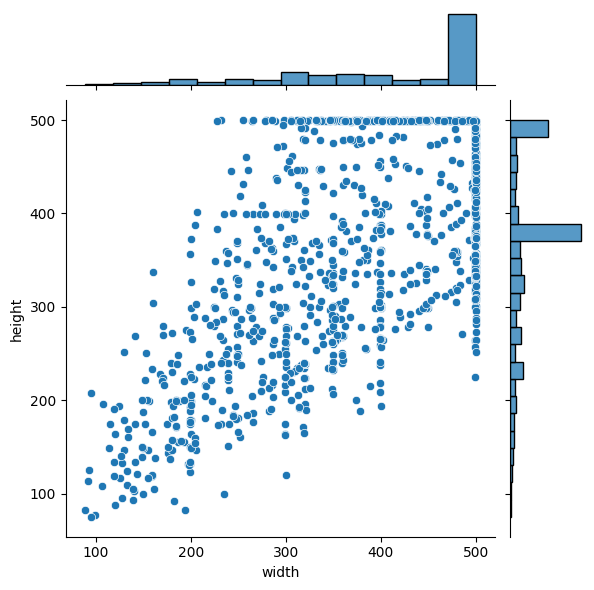

In [62]:
df_train_sizes= pd.DataFrame(data= train_sizes, columns= ["height", "width"])
"""Scatter for every image, width and height also has a histogram"""
sns.jointplot(data= df_train_sizes, x= "width", y= "height")

## 2.B) testing later if i need to change


## 2.C)

In [63]:
def resize(data, size= (350, 350)):
    """reads in image and resize, returns in a numpy array"""
    resized_images= []
    for image in data:
        
        resized_image= cv2.resize(image, size)
        resized_images.append(resized_image)
        
    return np.array(resized_images)

In [64]:
X_train= resize(X_train)
X_test= resize(X_test)
X_val= resize(X_val)

In [65]:
X_train.shape

(1600, 350, 350, 3)

In [66]:
train_image_generator = ImageDataGenerator(
    rotation_range=10,  # rotaiting the image
    shear_range=0.2,    # changing angle slightly
    zoom_range=0.1,     # zoom variation
    horizontal_flip=False,  # no horizontal mirroring
    height_shift_range=0.2, # moves picture up and down
    width_shift_range=0.2,  # moves picture left and right
)